<a href="https://colab.research.google.com/github/Tachawla/Adult-Data-Set/blob/Main/Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning and Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [6]:
df = pd.read_csv ('/content/adult (3) (1).data', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.columns=['Age','Work Class','fnlwt','Education','Education Years','Marital Status','Occupation',
'Relationship','Race','Sex','Capital Gain','Capital Loss','Hours per Week','Native Country','Income']
df.head()

,Age,Work Class,fnlwt,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Work Class       32561 non-null  object
 2   fnlwt            32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Years  32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours per Week   32561 non-null  int64 
 13  Native Country   32561 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.shape

(32561, 15)

In [11]:
# 1.  The source of data is UC Irvine.  However the data was extracted
# from 1994 Census Database.

# 2.  The data is attributes of a person, such as age, education, family status,
# occupation, gender, race, country of origin, and the money that the person makes
# (less than or equal to $50K or greater).

# 3.  The target is whether the person makes:
# -less than or equal to $50K or
# -greater than $50K.

# 4.  While income is a continuous variable, this dataset has the income in two
# classes.  Hence, it is a binary classification problem.

# 5.  There are 13 features.

# 6.  There are 32560 rows.

#  7.  This seems like a straight-forward dataset, and seems pretty clean so I do
# not forsee any cleaning or modeling issues.


In [12]:
# The 'fnlwt' column is a calculation that was previously performed on the 
# dataset.  I am going to drop this column.
df = df.drop(columns = 'fnlwt')
df.head(2)

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [13]:
# There are some duplicates.
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Length: 32561, dtype: bool

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32554    False
32555    False
32556    False
32558    False
32560    False
Length: 29096, dtype: bool

In [15]:
# Missing Values
df.isnull().sum()
# No missing values

Age                0
Work Class         0
Education          0
Education Years    0
Marital Status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital Gain       0
Capital Loss       0
Hours per Week     0
Native Country     0
Income             0
dtype: int64

In [16]:
# Check for inconsistent labels in categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29096 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              29096 non-null  int64 
 1   Work Class       29096 non-null  object
 2   Education        29096 non-null  object
 3   Education Years  29096 non-null  int64 
 4   Marital Status   29096 non-null  object
 5   Occupation       29096 non-null  object
 6   Relationship     29096 non-null  object
 7   Race             29096 non-null  object
 8   Sex              29096 non-null  object
 9   Capital Gain     29096 non-null  int64 
 10  Capital Loss     29096 non-null  int64 
 11  Hours per Week   29096 non-null  int64 
 12  Native Country   29096 non-null  object
 13  Income           29096 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [17]:
# I see a ? in the entry which needs to be cleaned up.
# Since it is challenging to interpolate the values for the
# '?', I plan to drop the rows with the '?'.
print (df['Work Class'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [18]:
# Locate and clean up the ?
df.loc[df['Work Class'] == ' ?', :]

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [19]:
# The rows with '?' are dropped.  
df = df.loc[df['Work Class'] != ' ?', :]
df

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [20]:
print (df['Education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']


In [21]:
print (df['Marital Status'].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [22]:
print (df['Occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv' ' ?']


In [23]:
# Locate and clean up the ?
df = df.loc[df['Occupation'] != ' ?', :]
df

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
print (df['Relationship'].unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [25]:
print (df['Race'].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


In [26]:
print (df['Sex'].unique())

[' Male' ' Female']


In [27]:
print (df['Native Country'].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador'
 ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan'
 ' Yugoslavia' ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland'
 ' Trinadad&Tobago' ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland'
 ' Hungary' ' Holand-Netherlands']


In [28]:
# Locate and clean up the ?
df = df.loc[df['Native Country'] != ' ?', :]
df

,Age,Work Class,Education,Education Years,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
# No outliers or problemmatic data
df.describe()

,Age,Education Years,Capital Gain,Capital Loss,Hours per Week
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,39.048877,10.144291,1215.398082,98.505798,41.164548
std,13.188650,2.620106,7805.224835,425.679089,12.346824
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


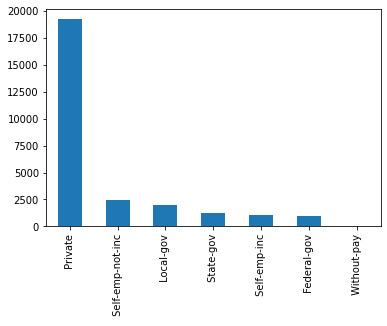

In [30]:
# Univariate visuals
# Plot barchart for categorial features and target
df['Work Class'].value_counts().plot(kind = 'bar')

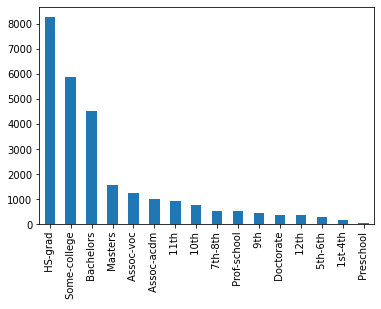

In [31]:
df['Education'].value_counts().plot(kind = 'bar')

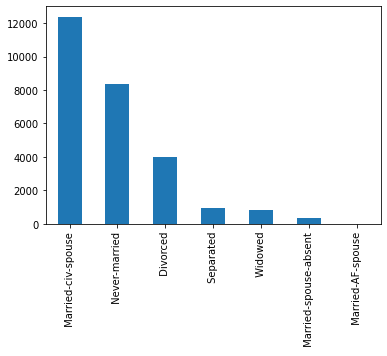

In [32]:
df['Marital Status'].value_counts().plot(kind = 'bar')

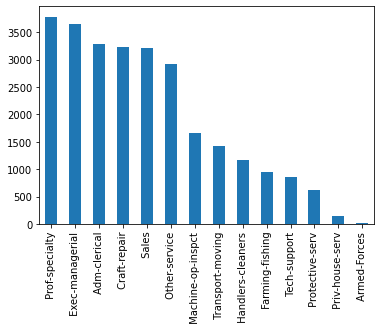

In [33]:
df['Occupation'].value_counts().plot(kind = 'bar')

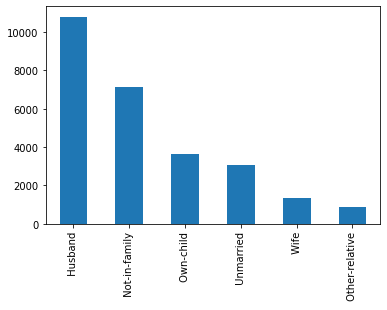

In [34]:
df['Relationship'].value_counts().plot(kind = 'bar')

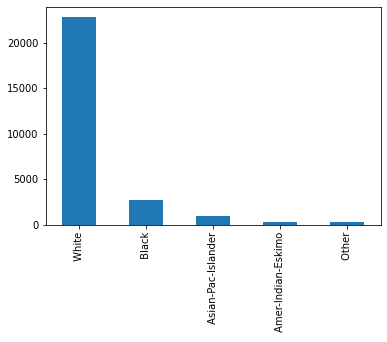

In [35]:
df['Race'].value_counts().plot(kind = 'bar')

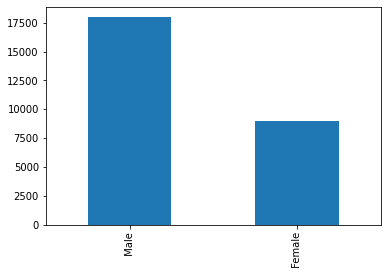

In [36]:
df['Sex'].value_counts().plot(kind = 'bar')

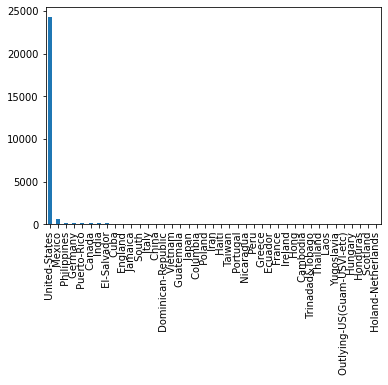

In [37]:
df['Native Country'].value_counts().plot(kind = 'bar')

Text(0, 0.5, 'Number of Persons')

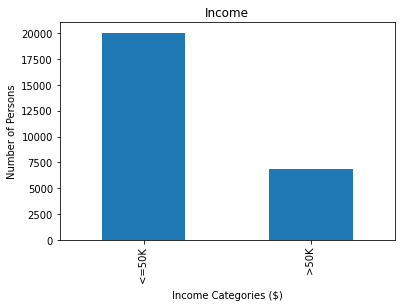

In [38]:
df['Income'].value_counts().plot(kind = 'bar')
# Add title and axis names
plt.title('Income')
plt.xlabel('Income Categories ($)')
plt.ylabel('Number of Persons')

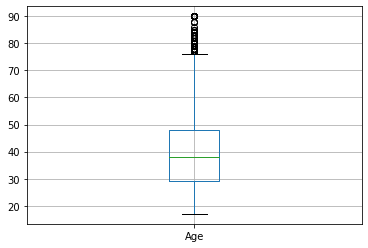

In [39]:
# Plot boxplot for numerical features
df.boxplot(column = 'Age')

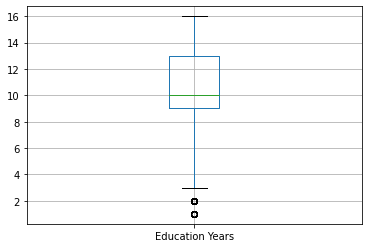

In [40]:
df.boxplot(column = 'Education Years')

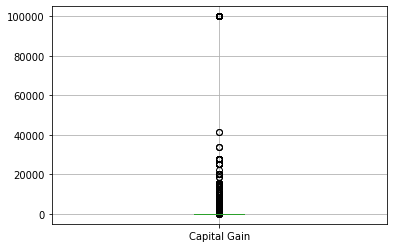

In [41]:
df.boxplot(column = 'Capital Gain')

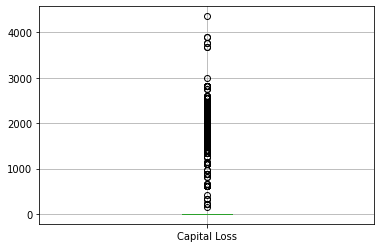

In [42]:
df.boxplot(column = 'Capital Loss')

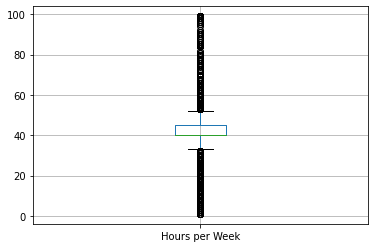

In [43]:
df.boxplot(column = 'Hours per Week')

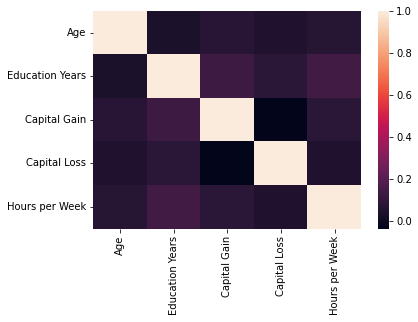

In [44]:
corr = df.corr()
sns.heatmap(corr)

In [45]:
# There is some low correlation between Education Years and Capital Gain
# and Education Years and Hours per Week.  No other moderate/strong correlations
# are found in the plotted features.

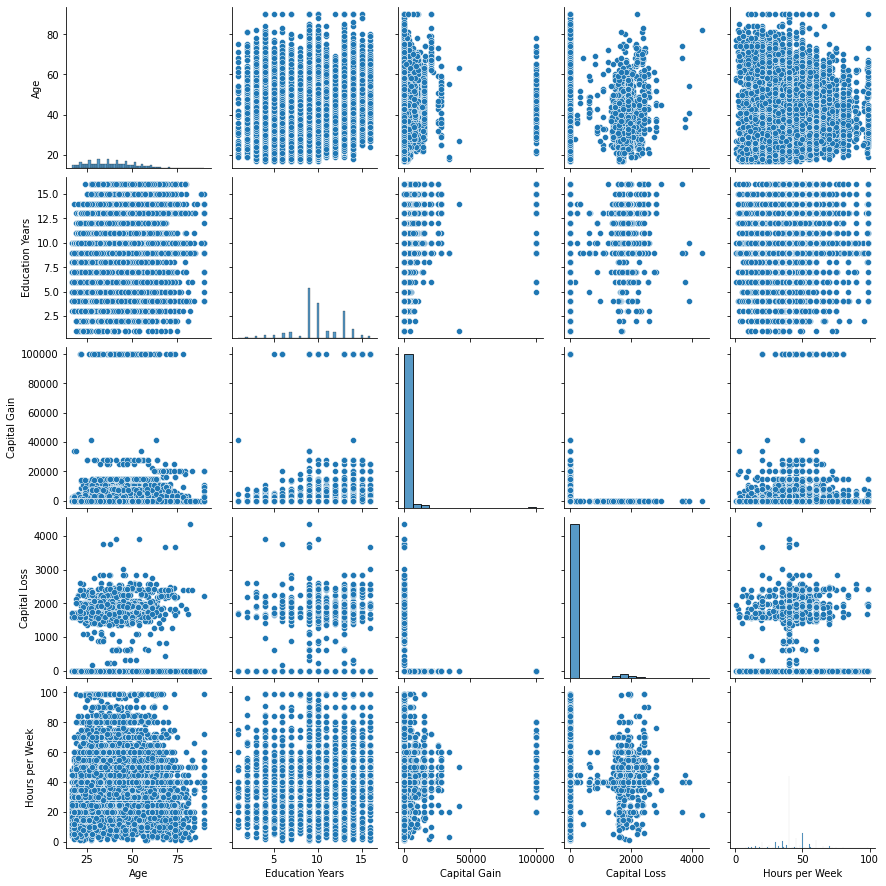

In [46]:
sns.pairplot(df)

Preprocessing of Data 

In [47]:
# Manage categorical features, using one-hot encode for nominal 
# variables, and numerical replacement for ordinal variables. All
# the categorical features are nominal and will be on-hot encoded.

In [48]:
df = pd.get_dummies(df, columns = ['Work Class', 'Education','Marital Status','Occupation',
                                   'Relationship','Race','Sex','Native Country'], drop_first = True)
df.head()

,Age,Education Years,Capital Gain,Capital Loss,Hours per Week,Income,Work Class_ Local-gov,Work Class_ Private,Work Class_ Self-emp-inc,Work Class_ Self-emp-not-inc,Work Class_ State-gov,Work Class_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,...,Native Country_ Canada,Native Country_ China,Native Country_ Columbia,Native Country_ Cuba,Native Country_ Dominican-Republic,Native Country_ Ecuador,Native Country_ El-Salvador,Native Country_ England,Native Country_ France,Native Country_ Germany,Native Country_ Greece,Native Country_ Guatemala,Native Country_ Haiti,Native Country_ Holand-Netherlands,Native Country_ Honduras,Native Country_ Hong,Native Country_ Hungary,Native Country_ India,Native Country_ Iran,Native Country_ Ireland,Native Country_ Italy,Native Country_ Jamaica,Native Country_ Japan,Native Country_ Laos,Native Country_ Mexico,Native Country_ Nicaragua,Native Country_ Outlying-US(Guam-USVI-etc),Native Country_ Peru,Native Country_ Philippines,Native Country_ Poland,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,<=50K,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,<=50K,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
X= df.drop(columns = 'Income')
y = df['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

Model Selection: Select the best Classification model from the following - Logistic Regression, KNN and Random Forest Models. 

In [51]:
# Logistic Regression
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

print('Training Accuracy', accuracy_score(y_train, lr.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, lr.predict(X_test)))

Training Accuracy 0.8446823272871444
Testing Accuracy 0.84002378828427


In [52]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Logistic Regression (C = 1)
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)

print('Training Accuracy', accuracy_score(y_train, lr.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, lr.predict(X_test)))

Training Accuracy 0.8447318862127069
Testing Accuracy 0.84002378828427


In [54]:
# Logistic Regression (C = 10000000)
lr = LogisticRegression(C=10000000, solver = 'liblinear')
lr.fit(X_train, y_train)

print('Training Accuracy', accuracy_score(y_train, lr.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, lr.predict(X_test)))

# Increasing C to a very high value makes a slight improvement in
# Train and Test scores.

Training Accuracy 0.8448805629893944
Testing Accuracy 0.840321141837645


In [55]:
# Logistic Regression (C=10000000 and L1 penalty)
lr = LogisticRegression(C = 10000000, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train, y_train)

print('Training Accuracy', accuracy_score(y_train, lr.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, lr.predict(X_test)))

# A high C value and changing the penalty does not make a huge difference in 
# train and test score.

Training Accuracy 0.8448805629893944
Testing Accuracy 0.840321141837645


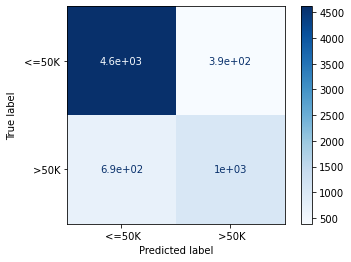

In [56]:
plot_confusion_matrix(lr, X_test, y_test, cmap = 'Blues');

In [57]:
# The Logistic Regression Model does moderately well with
# a 0.8 testing score.  It successfully predicts the $<50K
# but is less successful in correctly predicting the $<50K
# class.

In [58]:
# KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

Training Accuracy: 0.8678759044503915
Testing Accuracy: 0.8120725542670235


In [59]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
# N = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

Training Accuracy: 0.8853206462483894
Testing Accuracy: 0.7939339875111507


In [61]:
# N = 10
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

print('Training Accuracy:', accuracy_score(y_train, knn.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, knn.predict(X_test)))

Training Accuracy: 0.8459213004262067
Testing Accuracy: 0.8117752007136485


In [62]:
# Grid Search for the optimal N
params = {'n_neighbors': [8,10,12,20]}

# Instantiate and fit gridsearch
gs = GridSearchCV(knn, param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [8, 10, 12, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
gs.best_params_

{'n_neighbors': 20}

In [64]:
print('Training Accuracy:', accuracy_score(y_train, gs.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, gs.predict(X_test)))

Training Accuracy: 0.8350678957280206
Testing Accuracy: 0.8157894736842105


In [66]:
# The KNN model, optimized at N = 20, has a lower performance than 
# the Logistic Regression model above.

In [65]:
# Random Forest Classifier Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Training Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

Training Accuracy: 0.9833482010110021
Testing Accuracy: 0.8230746357418971


In [67]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# Grid Search
params = {'n_estimators': [2, 20, 200, 400],
          'max_depth': [2, 4, 8, 10, 50, 100]}

# instantiate and fit gridsearch
gs = GridSearchCV(RandomForestClassifier(), param_grid = params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [69]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [70]:
print('Training Accuracy:', accuracy_score(y_train, gs.predict(X_train)))
print('Testing Accuracy:', accuracy_score(y_test, gs.predict(X_test)))

Training Accuracy: 0.8586579442957677
Testing Accuracy: 0.8490930716622064


In [71]:
# The Random Forest Classifier model, at maximum depth = 10
# and n_estimators = 200, is slightly better than the Logistic
# Regession Model in the Training and Testing metrics.  This is
# the best model for this dataset.